
# Early Classification

This example presents the concept of early classification.

Early classifiers are implemented in the 
:mod:`tslearn.early_classification` module and in this example 
we use the method from [1].


[1] A. Dachraoui, A. Bondu & A. Cornuejols. Early classification of time
series as a non myopic sequential decision making problem. ECML/PKDD 2015


In [2]:
#df with raw features
from pathlib import Path
import pandas as pd

path=Path(r"Q:\carspi\ETiX_Output\240219_raw_features_full_df.csv")

df1 = pd.read_csv(path)
df1

,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,equivalent_diameter_area,...,Haralick.IMC1.Mean,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6
0,106,0,32264.0,32993.0,235.723649,175.364201,121.477250,93.158784,0.668247,202.681525,...,-0.033900,0.028199,0.518548,0.180877,0.365697,0.002497,0.004451,0.015286,0.064299,0.243633
1,106,1,33631.0,34302.0,242.115162,177.841359,124.198002,93.623710,0.678574,206.930711,...,-0.039054,0.025332,0.551364,0.149001,0.419379,0.001565,0.001841,0.012733,0.046679,0.224775
2,106,2,34621.0,35361.0,245.460637,180.685370,123.311314,86.448832,0.676865,209.954343,...,-0.042401,0.026222,0.571650,0.143042,0.339451,0.001278,0.003956,0.018690,0.073104,0.243937
3,106,3,36939.0,37628.0,257.880409,183.237527,132.601262,89.735916,0.703644,216.869075,...,-0.044629,0.027596,0.581277,0.144405,0.304059,0.005598,0.006374,0.042172,0.068877,0.234172
4,106,4,38167.0,38692.0,266.193467,183.078093,137.492729,90.809600,0.725935,220.444400,...,-0.050993,0.032595,0.612231,0.152366,0.044600,0.005647,0.010839,0.034391,0.133557,0.311358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,99,18,58419.0,59900.0,313.491598,238.726082,129.960903,147.465961,0.648157,272.729501,...,-0.091428,0.040896,0.746168,0.105661,0.445123,0.003127,0.005463,0.018671,0.093554,0.171988
2802,99,19,59701.0,61389.0,309.046673,247.711646,138.600023,143.694243,0.597948,275.705774,...,-0.103522,0.039851,0.777132,0.089391,0.480715,0.001046,0.009047,0.022269,0.064014,0.168311
2803,99,20,61192.0,62296.0,310.750385,252.075525,130.509756,153.088427,0.584792,279.127344,...,-0.103956,0.038293,0.777355,0.086472,0.425636,0.004613,0.007465,0.026800,0.090559,0.170039
2804,99,21,62887.0,64009.0,314.106298,255.950984,133.224037,154.567812,0.579665,282.966809,...,-0.110094,0.041684,0.791176,0.086347,0.247856,0.003768,0.009206,0.065973,0.097018,0.227144


In [3]:
#df where i saved output 'endpoint clusters'
path=Path(r"Q:\carspi\ETiX_Output\240219_endpoint_clusters.csv")

df2 = pd.read_csv(path)
df2

,Unnamed: 0,embryo ID,timepoint,area,area_convex,axis_major_length,axis_minor_length,centroid_local-0,centroid_local-1,eccentricity,...,Haralick.IMC1.Range,Haralick.IMC2.Mean,Haralick.IMC2.Range,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,endpoint clusters
0,0,106,0,0.596134,0.541092,0.526974,0.610106,0.679627,0.375151,0.739608,...,0.432176,0.374846,0.741976,0.674087,0.048208,0.018187,0.049329,0.235928,0.531836,0.0
1,1,106,1,0.549444,0.503834,0.532905,0.547085,0.619795,0.325526,0.797662,...,0.308483,0.253378,0.740097,0.740404,0.056937,0.006487,0.050469,0.128992,0.470167,0.0
2,2,106,2,0.558377,0.508400,0.500731,0.555871,0.617561,0.288279,0.741912,...,0.374928,0.356929,0.700969,0.644721,0.020674,0.022060,0.058726,0.242665,0.552881,0.0
3,3,106,3,0.580525,0.533073,0.536903,0.563300,0.713195,0.329481,0.773618,...,0.395081,0.367138,0.699105,0.582786,0.076013,0.037054,0.151381,0.228420,0.533674,0.0
4,4,106,4,0.553197,0.509527,0.559531,0.529939,0.747215,0.338796,0.801564,...,0.551036,0.400102,0.730926,0.080837,0.131058,0.050684,0.238350,0.412051,0.750967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,2801,99,18,0.390149,0.345811,0.385100,0.449956,0.334724,0.524102,0.737866,...,0.737297,0.540635,0.542578,0.811611,0.056797,0.041167,0.089206,0.277243,0.347035,0.0
2802,2802,99,19,0.376534,0.331981,0.374596,0.460483,0.359129,0.474671,0.716024,...,0.771076,0.603370,0.419053,0.890087,0.009432,0.074746,0.115205,0.192795,0.267882,0.0
2803,2803,99,20,0.370516,0.329926,0.390699,0.462109,0.279032,0.545283,0.630158,...,0.581693,0.627495,0.395951,0.746120,0.073096,0.076629,0.094907,0.246685,0.328245,0.0
2804,2804,99,21,0.366638,0.324016,0.380523,0.464264,0.278816,0.542645,0.666903,...,0.762607,0.658921,0.391778,0.467446,0.155608,0.079433,0.261446,0.285277,0.468687,0.0


In [4]:
#rephase data to (n samples, t timepoints, x features)
import numpy as np

embryo_ids = df1['embryo ID'].unique()
timepoints = df1['timepoint'].unique()
features = ["embryo ID", "timepoint", "area", "axis_major_length", "axis_minor_length", "area_convex",	"centroid_local-0",	"centroid_local-1",	"eccentricity",	"equivalent_diameter_area",	"extent",	"perimeter",	"solidity",	
"Gradient.Mag.Mean",	"Gradient.Mag.Std",	"Gradient.Mag.Skewness","Gradient.Mag.Kurtosis", "Gradient.Mag.HistEntropy",	"Gradient.Mag.HistEnergy",	"Haralick.ASM.Mean",
"Haralick.ASM.Range",	"Haralick.Contrast.Mean",	"Haralick.Contrast.Range",	"Haralick.Correlation.Mean",	"Haralick.Correlation.Range",	"Haralick.SumOfSquares.Mean",	"Haralick.SumOfSquares.Range",	"Haralick.IDM.Mean",	
"Haralick.IDM.Range",	"Haralick.SumAverage.Mean",	"Haralick.SumAverage.Range",	"Haralick.SumVariance.Mean",	"Haralick.SumVariance.Range",	"Haralick.SumEntropy.Mean",	"Haralick.SumEntropy.Range",	"Haralick.Entropy.Mean",
"Haralick.Entropy.Range",	"Haralick.DifferenceVariance.Mean",	"Haralick.DifferenceVariance.Range",	"Haralick.DifferenceEntropy.Mean",	"Haralick.DifferenceEntropy.Range",	"Haralick.IMC1.Mean",	"Haralick.IMC1.Range",	"Haralick.IMC2.Mean", "Haralick.IMC2.Range",
'Shape.FSD1', 'Shape.FSD2', 'Shape.FSD3', 'Shape.FSD4', 'Shape.FSD5', 'Shape.FSD6']
# Initialize the array X with zeros
X = np.zeros((len(embryo_ids), len(timepoints), len(features)))

# Fill in the values from your DataFrame
for i, embryo_id in enumerate(embryo_ids):
    for j, timepoint in enumerate(timepoints):
        # Select the corresponding rows in the DataFrame
        rows = (df1['embryo ID'] == embryo_id) & (df1['timepoint'] == timepoint)
        
        # Extract the values for the selected features
        values = df1.loc[rows, features].values

        # Fill the values into the array
        X[i, j, :] = values

print(X.shape)

(122, 23, 51)


In [5]:
#y array just output cluster
import numpy as np

# Get unique embryo IDs
embryo_ids = df2['embryo ID'].unique()

# Initialize an empty list to store 'endpoint clusters' values for each embryo ID
y_list = []

# Iterate over each unique embryo ID
for embryo_id in embryo_ids:
    # Filter the DataFrame for the current embryo ID
    subset_df = df2[df2['embryo ID'] == embryo_id]
    # Extract the 'endpoint clusters' value for the current embryo ID (assuming each embryo ID has only one unique value)
    endpoint_cluster = subset_df['endpoint clusters'].iloc[0]
    # Append the 'endpoint clusters' value to the list
    y_list.append(endpoint_cluster)

# Convert the list to a numpy array
y = np.array(y_list)

print(y.shape)


(122,)


plot function definition

## Data loading and visualization



In [6]:
# Author: Romain Tavenard
# License: BSD 3 clause
# sphinx_gallery_thumbnail_number = 2

import numpy
import matplotlib.pyplot as plt

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.early_classification import NonMyopicEarlyClassifier

def plot_partial(time_series, t, y_true=0, y_pred=0, color="k"):
    plt.plot(time_series[:t+1].ravel(), color=color, linewidth=1.5)
    plt.plot(numpy.arange(t+1, time_series.shape[0]),
             time_series[t+1:].ravel(),
             linestyle="dashed", color=color, linewidth=1.5)
    plt.axvline(x=t, color=color, linewidth=1.5)
    plt.text(x=t - 20, y=time_series.max() - .25, s="Prediction time")
    plt.title(
        "Sample of class {} predicted as class {}".format(y_true, y_pred)
    )
    plt.xlim(0, time_series.shape[0] - 1)

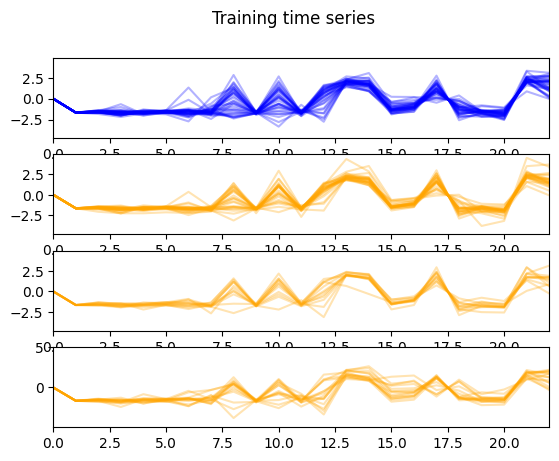

In [7]:
from sklearn.model_selection import train_test_split

numpy.random.seed(0)
X = TimeSeriesScalerMeanVariance().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #adjust to desired test size

# Scale time series
#X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
#X_test = TimeSeriesScalerMeanVariance().fit_transform(X_test)

size = X_train.shape[1]
n_classes = len(set(y_train))

plt.figure()
for i, cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i + 1)
    for ts in X_train[y_train == cl]:
        plt.plot(ts.ravel(), color="orange" if cl > 0 else "blue", alpha=.3)
    plt.xlim(0, size - 1)
plt.suptitle("Training time series")
plt.show()

## Model fitting

As observed in the following figure, the optimal classification time as
estimated by `NonMyopicEarlyClassifier` is data-dependent.



In [33]:
X_test.shape

(37, 23, 51)

Apply early classifier, returns preds=predicted output and times=earliest timepoint of pred

In [8]:
early_clf = NonMyopicEarlyClassifier(n_clusters=4,
                                     cost_time_parameter=1e-3,
                                     lamb=1e2,
                                     random_state=0)
early_clf.fit(X_train, y_train)

preds, times = early_clf.predict_class_and_earliness(X_test)


In [9]:
import pandas as pd

# Create a DataFrame with prediction results
results_df = pd.DataFrame({
    'Embryo_ID': range(len(preds)),
    'Predicted_Class': preds,
    'Optimal_Classification_Time': times
})

# Save the DataFrame to a CSV file
#results_df.to_csv('prediction_results.csv', index=False)
results_df

,Embryo_ID,Predicted_Class,Optimal_Classification_Time
0,0,1.0,3
1,1,0.0,10
2,2,1.0,10
3,3,0.0,10
4,4,0.0,10
5,5,0.0,10
6,6,1.0,3
7,7,1.0,10
8,8,0.0,10
9,9,1.0,10


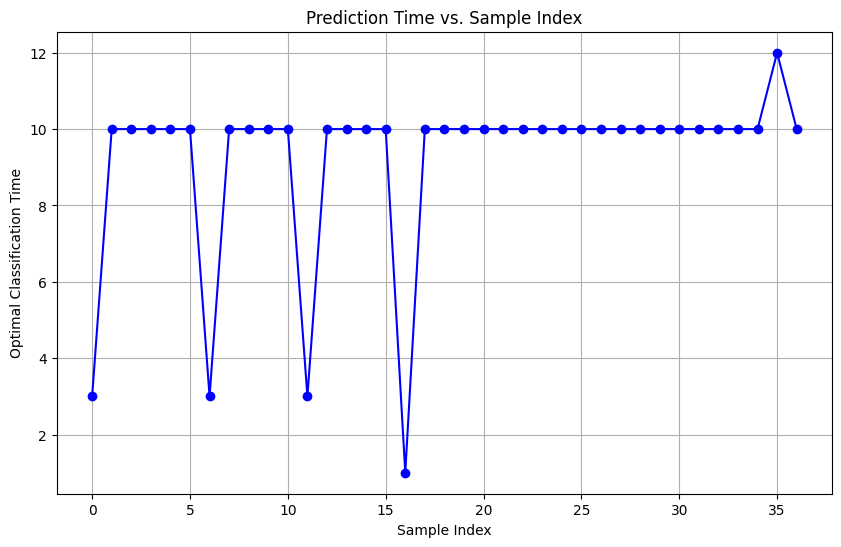

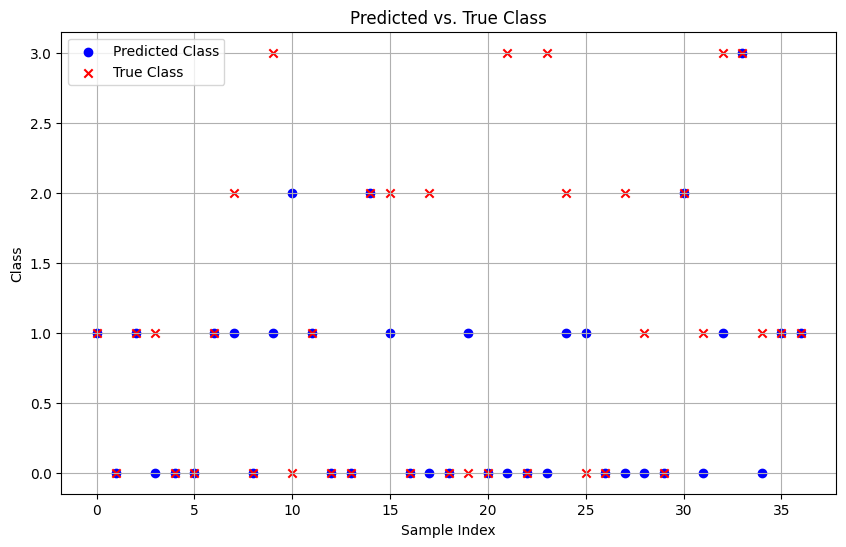

In [10]:
import matplotlib.pyplot as plt

# Plot prediction time vs. sample index
plt.figure(figsize=(10, 6))
plt.plot(range(len(times)), times, marker='o', linestyle='-', color='b')
plt.xlabel('Sample Index')
plt.ylabel('Optimal Classification Time')
plt.title('Prediction Time vs. Sample Index')
plt.grid(True)
plt.show()

# Plot correct and false positive predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(preds)), preds, c='b', label='Predicted Class')
plt.scatter(range(len(y_test)), y_test, c='r', marker='x', label='True Class')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Predicted vs. True Class')
plt.legend()
plt.grid(True)
plt.show()


Total Correct Predictions: 21
Most Frequent Optimal Timepoint: 10, Frequency: 32


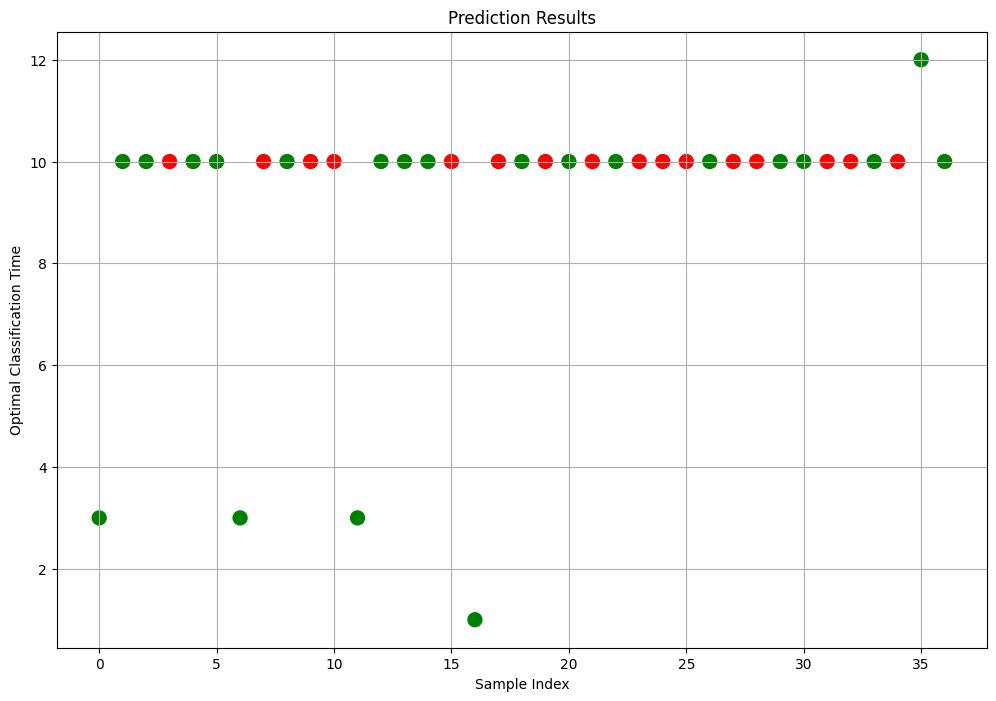

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with prediction results
results_df = pd.DataFrame({
    'Sample_Index': range(len(preds)),
    'Predicted_Class': preds,
    'True_Class': y_test,
    'Optimal_Classification_Time': times
})

# Create a combined plot using Seaborn
fig, ax = plt.subplots(figsize=(12, 8))

# Plot optimal classification time with different colors based on prediction correctness
correct_predictions = (results_df['Predicted_Class'] == results_df['True_Class'])
colors = ['green' if correct else 'red' for correct in correct_predictions]
ax.scatter(results_df['Sample_Index'], results_df['Optimal_Classification_Time'], c=colors, s=100)

# Set labels and title for the y-axis
ax.set_xlabel('Sample Index')
ax.set_ylabel('Optimal Classification Time')
plt.title('Prediction Results')
plt.grid(True)

# Print the total number of correct predictions
total_correct_predictions = sum(correct_predictions)
print(f"Total Correct Predictions: {total_correct_predictions}")

# Calculate and print the most frequent optimal timepoint
most_frequent_timepoint = results_df['Optimal_Classification_Time'].value_counts().idxmax()
frequency_of_most_frequent = results_df['Optimal_Classification_Time'].value_counts().max()
print(f"Most Frequent Optimal Timepoint: {most_frequent_timepoint}, Frequency: {frequency_of_most_frequent}")

plt.show()



## Earliness-Accuracy trade-off

The trade-off between earliness and accuracy is controlled via
``cost_time_parameter``.



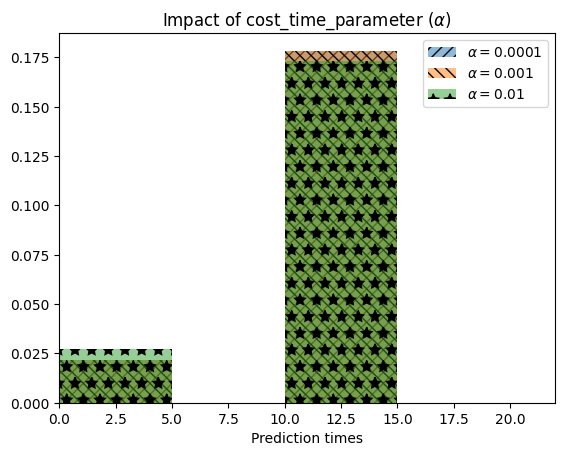

In [38]:
plt.figure()
hatches = ["///", "\\\\\\", "*"]
for i, cost_t in enumerate([1e-4, 1e-3, 1e-2]):
    early_clf.set_params(cost_time_parameter=cost_t)
    early_clf.fit(X_train, y_train)
    preds, times = early_clf.predict_class_and_earliness(X_test)
    plt.hist(times,
             alpha=.5, hatch=hatches[i],
             density=True,
             label="$\\alpha={}$".format(cost_t),
             bins=numpy.arange(0, size, 5))
plt.legend(loc="upper right")
plt.xlim(0, size - 1)
plt.xlabel("Prediction times")
plt.title("Impact of cost_time_parameter ($\\alpha$)")
plt.show()